In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import json
import random
import seaborn as sns
import re

import spacy

# Text analysis
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SpanishStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('tokenizers/punkt/spanish.pickle')
nltk.download('stopwords')

import unicodedata

from wordcloud import WordCloud, STOPWORDS

import librosa

# ### Scikit-Learn ###
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as skmetrics

from pyannote.audio.pipelines import VoiceActivityDetection

import analysis_utils as aute

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading tokenizers/punkt/spanish.pickle: Package
[nltk_data]     'tokenizers/punkt/spanish.pickle' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [2]:
config_json = open("../LableniBotConfig/config.json")
config_dict = json.load(config_json)

hugging_face_key = config_dict["HUGGING_FACE"]

silence_detection_pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation",
                                                    use_auth_token=hugging_face_key)

In [5]:
conv_idx = random.choices(np.arange(20), k=1)[0]
personality_idx = random.choices(np.arange(6), k=1)[0]

all_conv = os.listdir("../Conversations/")
all_personality = os.listdir("../Conversations/" + all_conv[conv_idx])
path_to_audios = "../Conversations/" + all_conv[conv_idx] + "/" + all_personality[2:][personality_idx] + "/Audios/"
list_of_audios = os.listdir(path_to_audios)
all_subj_audios_idx = random.choices(np.arange(len(list_of_audios)), k=1)[0]
path_to_audio_study = path_to_audios + list_of_audios[all_subj_audios_idx]
path_to_audio_study

'../Conversations/User_04_CB2_Conversations/User_04_CB2_20230201_102147/Audios/Subject_User_04_CB2_T=1.wav'

In [6]:
audio_duration = librosa.get_duration(filename=path_to_audio_study)
        
vad = silence_detection_pipeline(path_to_audio_study)
segments_timeline = list(vad.get_timeline().segments_set_)

first_start = np.min([seg.start for seg in segments_timeline])
last_end = np.max([seg.end for seg in segments_timeline])
num_talk_stops = len(segments_timeline)-1

time_waste_silence = audio_duration - last_end
time_talking = last_end - first_start
perc_talking_audio = 100 * time_talking/audio_duration

result_dict = {
    "AudioDuration": audio_duration,
    "FirstStart": first_start,
    "LastEnd": last_end,
    "NumTalks": num_talk_stops,
    "TimeWasteSilence": time_waste_silence,
    "TimeTalking": time_talking,
    "PercTalkingAudio": perc_talking_audio,
}

print(result_dict)

{'AudioDuration': 5.828208616780046, 'FirstStart': 1.3584375, 'LastEnd': 5.7796875, 'NumTalks': 0, 'TimeWasteSilence': 0.048521116780046114, 'TimeTalking': 4.42125, 'PercTalkingAudio': 75.85950144733565}


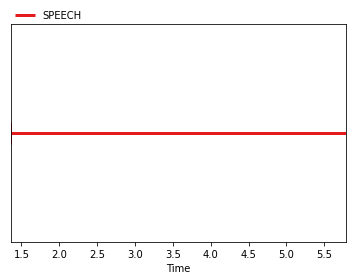

In [7]:
vad

In [37]:
num_iter, counter = 50, 0
result_audio_list = [] 
while True:
    try:
        conv_idx = random.choices(np.arange(20), k=1)[0]
        personality_idx = random.choices(np.arange(6), k=1)[0]

        all_conv = os.listdir("../Conversations/")
        all_personality = os.listdir("../Conversations/" + all_conv[conv_idx])
        path_to_audios = "../Conversations/" + all_conv[conv_idx] + "/" + all_personality[2:][personality_idx] + "/Audios/"
        list_of_audios = os.listdir(path_to_audios)
        all_subj_audios_idx = random.choices(np.arange(len(list_of_audios)), k=1)[0]
        path_to_audio_study = path_to_audios + list_of_audios[all_subj_audios_idx]

        audio_duration = librosa.get_duration(filename=path_to_audio_study)

        vad = silence_detection_pipeline(path_to_audio_study)
        segments_timeline = list(vad.get_timeline().segments_set_)

        first_start = np.min([seg.start for seg in segments_timeline])
        last_end = np.max([seg.end for seg in segments_timeline])
        num_talk_stops = len(segments_timeline)-1

        time_waste_silence = audio_duration - last_end
        time_talking = last_end - first_start
        perc_talking_audio = 100 * time_talking/audio_duration

        result_audio_list.append({
            "AudioDuration": audio_duration,
            "FirstStart": first_start,
            "LastEnd": last_end,
            "NumTalks": num_talk_stops,
            "TimeWasteSilence": time_waste_silence,
            "TimeTalking": time_talking,
            "PercTalkingAudio": perc_talking_audio,
            "AudioPath": all_personality[2:][personality_idx] + list_of_audios[all_subj_audios_idx]
        })

        counter += 1
    except:
        pass
    
    if counter >= num_iter:
            break

In [38]:
df_audio = pd.DataFrame(result_audio_list)

In [39]:
df_audio

,AudioDuration,FirstStart,LastEnd,NumTalks,TimeWasteSilence,TimeTalking,PercTalkingAudio,AudioPath
0,9.125442,0.008438,6.910312,0,2.215130,6.901875,75.633321,../Conversations/USER_08_CB2_Conversations/USE...
1,5.944308,0.869063,2.202187,0,3.742121,1.333125,22.426915,../Conversations/User_08_CB_Conversations/User...
2,5.990748,2.016563,4.834687,0,1.156061,2.818125,47.041285,../Conversations/USER_02_CB2_Conversations/USE...
3,5.990748,0.008438,0.784688,0,5.206061,0.776250,12.957480,../Conversations/USER_09_CB2_Conversations/USE...
4,12.260136,0.734063,9.374063,0,2.886074,8.640000,70.472301,../Conversations/User_09_CB_Conversations/User...
5,24.775692,1.139063,24.730313,1,0.045379,23.591250,95.219340,../Conversations/User_04_CB_Conversations/User...
6,5.990748,0.008438,4.716563,0,1.274186,4.708125,78.589932,../Conversations/USER_02_CB2_Conversations/USE...
7,5.944308,0.885938,3.653438,0,2.290871,2.767500,46.557140,../Conversations/User_03_CB_Conversations/User...
8,9.125442,0.666563,6.387187,1,2.738255,5.720625,62.688743,../Conversations/USER_09_CB2_Conversations/USE...
9,5.967528,1.004063,1.577813,0,4.389716,0.573750,9.614533,../Conversations/User_06_CB_Conversations/User...


In [40]:
df_audio["AudioPath"].iloc[0]

'../Conversations/USER_08_CB2_Conversations/USER_08_CB2_20230202_125214/Audios/Subject_USER_08_CB2_T=1.wav'

In [41]:
df_audio[df_audio["LastEnd"] > 5]["TimeWasteSilence"].mean()

2.3201030868696684

In [42]:
df_audio["TimeWasteSilence"].mean()

2.6844264739229016

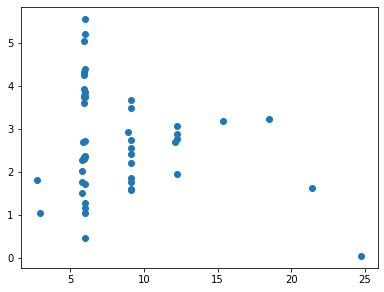

In [43]:
plt.scatter(df_audio["AudioDuration"], df_audio["TimeWasteSilence"])

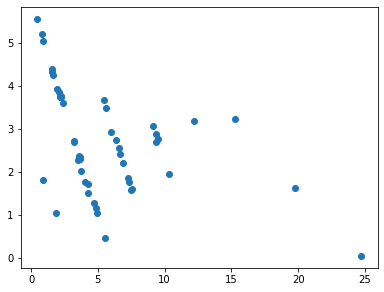

In [44]:
plt.scatter(df_audio["LastEnd"], df_audio["TimeWasteSilence"])

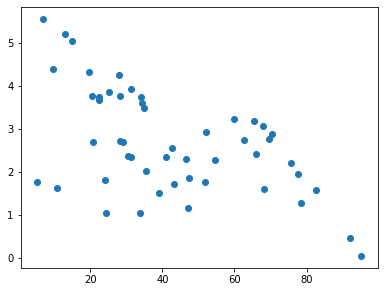

In [45]:
plt.scatter(df_audio["PercTalkingAudio"], df_audio["TimeWasteSilence"])